## まとめ

In [1]:
# 矢作の株価を取得して整形するまでをまずはまとめる
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 取得したい日数と会社
days = 15
tickers = {
    '矢作': '1870.T',
    '清水': '1803.T',
    '戸田': '1860.T',
    '大林': '1802.T',
    '鹿島': '1812.T',
    '大成': '1801.T'
}

def get_data(days, tickers):
    df = pd.DataFrame()  # pandasの空のデータを用意 
    for company in tickers.keys():

        # company = '大成'

        # 株価の取得
        tkr = yf.Ticker(tickers[company])
        hist = tkr.history(period=f'{days}d')

        # Date表示形式を変更
        hist.index = hist.index.strftime('%d %B %Y')

        # 終値closeのみを使用
        hist = hist[["Close"]]  
        hist.columns = [company]

        # 表に合わせて行列を入替え
        hist = hist.T

        # index名にNameを入れる
        hist.index.name = 'Name'

        df = pd.concat([df, hist])  # panadasのデータにhistを順次追加していく★重要★

    return df


In [2]:
for company in tickers.keys():
    print(company)

矢作
清水
戸田
大林
鹿島
大成


In [3]:
def get_data(days, tickers):
    df = pd.DataFrame()  # pandasの空のデータを用意 
    for company in tickers.keys():

        # company = '大成'

        # 株価の取得
        tkr = yf.Ticker(tickers[company])
        hist = tkr.history(period=f'{days}d')

        # Date表示形式を変更
        hist.index = hist.index.strftime('%d %B %Y')

        # 終値closeのみを使用
        hist = hist[["Close"]]  
        hist.columns = [company]

        # 表に合わせて行列を入替え
        hist = hist.T

        # index名にNameを入れる
        hist.index.name = 'Name'

        df = pd.concat([df, hist])  # panadasのデータにhistを順次追加していく★重要★

    return df

In [4]:
days = 15
tickers = {
    '矢作': '1870.T',
    '清水': '1803.T',
    '戸田': '1860.T',
    '大林': '1802.T',
    '鹿島': '1812.T',
    '大成': '1801.T'
}

# 定義した関数を実行
df = get_data(days, tickers)
df

Date,01 December 2022,02 December 2022,05 December 2022,06 December 2022,07 December 2022,08 December 2022,09 December 2022,12 December 2022,13 December 2022,14 December 2022,15 December 2022,16 December 2022,19 December 2022,20 December 2022,21 December 2022
Name,,,,,,,,,,,,,,,
矢作,745.0,732.0,736.0,733.0,755.0,747.0,750.0,753.0,762.0,769.0,780.0,763.0,766.0,749.0,740.0
清水,723.0,711.0,709.0,715.0,714.0,711.0,720.0,715.0,715.0,719.0,720.0,715.0,718.0,708.0,700.0
戸田,723.0,704.0,705.0,706.0,713.0,712.0,718.0,722.0,727.0,727.0,730.0,720.0,721.0,714.0,707.0
大林,1009.0,990.0,993.0,1004.0,1013.0,1004.0,1012.0,1005.0,1011.0,1016.0,1018.0,1009.0,1007.0,1004.0,1002.0
鹿島,1519.0,1503.0,1494.0,1524.0,1540.0,1540.0,1544.0,1532.0,1530.0,1535.0,1539.0,1517.0,1506.0,1503.0,1499.0
大成,4090.0,4025.0,4025.0,4055.0,4130.0,4110.0,4140.0,4160.0,4165.0,4210.0,4230.0,4150.0,4205.0,4175.0,4190.0


### おまけ その他株価周辺情報の取得


In [5]:
apple = yf.Ticker('AAPL')
apple.info  # 情報を一式取得

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 164000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand rad

In [6]:
apple.actions.head()  # 配当金と分割情報


,Dividends,Stock Splits
Date,,
1987-05-11 00:00:00-04:00,0.000536,0.0
1987-06-16 00:00:00-04:00,0.000000,2.0
1987-08-10 00:00:00-04:00,0.000536,0.0
1987-11-17 00:00:00-05:00,0.000714,0.0
1988-02-12 00:00:00-05:00,0.000714,0.0


<AxesSubplot: xlabel='Date'>

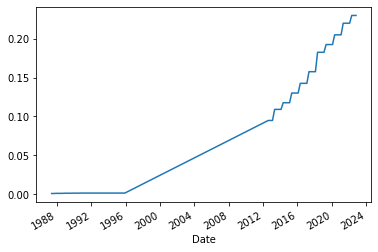

In [7]:
apple.dividends.plot()  # 配当金のグラフ

<AxesSubplot: xlabel='Date'>

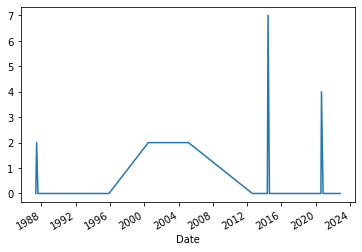

In [8]:
apple.actions['Stock Splits'].plot()    # 株式分割数のグラフ

## グラフ化のためのデータ整形

In [9]:
import altair as alt

In [10]:
df

Date,01 December 2022,02 December 2022,05 December 2022,06 December 2022,07 December 2022,08 December 2022,09 December 2022,12 December 2022,13 December 2022,14 December 2022,15 December 2022,16 December 2022,19 December 2022,20 December 2022,21 December 2022
Name,,,,,,,,,,,,,,,
矢作,745.0,732.0,736.0,733.0,755.0,747.0,750.0,753.0,762.0,769.0,780.0,763.0,766.0,749.0,740.0
清水,723.0,711.0,709.0,715.0,714.0,711.0,720.0,715.0,715.0,719.0,720.0,715.0,718.0,708.0,700.0
戸田,723.0,704.0,705.0,706.0,713.0,712.0,718.0,722.0,727.0,727.0,730.0,720.0,721.0,714.0,707.0
大林,1009.0,990.0,993.0,1004.0,1013.0,1004.0,1012.0,1005.0,1011.0,1016.0,1018.0,1009.0,1007.0,1004.0,1002.0
鹿島,1519.0,1503.0,1494.0,1524.0,1540.0,1540.0,1544.0,1532.0,1530.0,1535.0,1539.0,1517.0,1506.0,1503.0,1499.0
大成,4090.0,4025.0,4025.0,4055.0,4130.0,4110.0,4140.0,4160.0,4165.0,4210.0,4230.0,4150.0,4205.0,4175.0,4190.0


In [11]:
companies = ['矢作', '大成']
data = df.loc[companies]  # ★pandas_コラム名やインデックス名で特定の値を取得★
data

Date,01 December 2022,02 December 2022,05 December 2022,06 December 2022,07 December 2022,08 December 2022,09 December 2022,12 December 2022,13 December 2022,14 December 2022,15 December 2022,16 December 2022,19 December 2022,20 December 2022,21 December 2022
Name,,,,,,,,,,,,,,,
矢作,745.0,732.0,736.0,733.0,755.0,747.0,750.0,753.0,762.0,769.0,780.0,763.0,766.0,749.0,740.0
大成,4090.0,4025.0,4025.0,4055.0,4130.0,4110.0,4140.0,4160.0,4165.0,4210.0,4230.0,4150.0,4205.0,4175.0,4190.0


In [12]:
data.sort_index() # アルファベット順にソート

Date,01 December 2022,02 December 2022,05 December 2022,06 December 2022,07 December 2022,08 December 2022,09 December 2022,12 December 2022,13 December 2022,14 December 2022,15 December 2022,16 December 2022,19 December 2022,20 December 2022,21 December 2022
Name,,,,,,,,,,,,,,,
大成,4090.0,4025.0,4025.0,4055.0,4130.0,4110.0,4140.0,4160.0,4165.0,4210.0,4230.0,4150.0,4205.0,4175.0,4190.0
矢作,745.0,732.0,736.0,733.0,755.0,747.0,750.0,753.0,762.0,769.0,780.0,763.0,766.0,749.0,740.0


In [13]:
# alt airが便利なところ → pandasのデータをまるっと受け渡しが可能
# 日付に対して株価 + 会社名が紐づいている

data = data.T.reset_index()  # インデックスからデータを取り除いて通常のデータ型に変更
data.head()


Name,Date,矢作,大成
0,01 December 2022,745.0,4090.0
1,02 December 2022,732.0,4025.0
2,05 December 2022,736.0,4025.0
3,06 December 2022,733.0,4055.0
4,07 December 2022,755.0,4130.0


In [14]:
# 日付 企業名 株価の順にデータを調整 イメージはピボットテーブルの逆の処理
# Date列を基準に元の汚い形のデータに戻す 溶けるメルト
data = pd.melt(data, id_vars=['Date']).rename(
    columns={'value': "株価"}
)  
data

,Date,Name,株価
0,01 December 2022,矢作,745.0
1,02 December 2022,矢作,732.0
2,05 December 2022,矢作,736.0
3,06 December 2022,矢作,733.0
4,07 December 2022,矢作,755.0
5,08 December 2022,矢作,747.0
6,09 December 2022,矢作,750.0
7,12 December 2022,矢作,753.0
8,13 December 2022,矢作,762.0
9,14 December 2022,矢作,769.0


## 22. Altairでシンプルなグラフの可視化

In [23]:
# https://altair-viz.github.io/index.html
chart = (
    alt.Chart(data)
    .mark_line(opacity=0.8)
    .encode(
        x="Date:T",
        y=alt.Y("株価:Q", stack=None),     # Y軸には他の設定も行っていくためX軸と異なる書き方
        color="Name:N"
    )
)

# T Q Nはグラフ表示の設定

In [24]:
chart

alt.Chart(...)

In [35]:
# グラフ表示の対象範囲の変更
# https://altair-viz.github.io/index.html

ymin, ymax = 3500, 4500

chart = (
    alt.Chart(data)
    .mark_line(opacity=0.8, clip=True) # はみ出している線をクリップ
    .encode(
        x="Date:T",
        y=alt.Y("株価:Q", stack=None, scale=alt.Scale(domain=[ymin, ymax])),   #上限,下限
        color="Name:N"
    )
)

# T Q Nはグラフ表示の設定

In [36]:
chart

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)